In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import os, sys
import re
import collections
import ast

In [2]:
pool_results_folder = "/scratch/tweber/DATA/MC_DATA/DEMULTIPLEXING_POOLS/FINAL_RESULTS/without_sanity_check"

In [3]:
ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
#ldir = sorted([e for e in os.listdir(pool_results_folder) if e.startswith("20") and e != "2023-11-27-HNKL2AFX5--HGSVCpool3NEW"])
ldir = sorted([e for e in os.listdir(pool_results_folder) if e.startswith("20") and e != "2022-11-15-H33JMAFX5--HGSVCpool1xulOPxmanual"])

print(len(ldir))
ldir

21


['2021-07-29-HWYJ2AFX2--HGSVCxpool1x01',
 '2021-08-03-H22VWAFX3--HGSVCxpool2x02',
 '2021-08-03-H22VWAFX3--HGSVCxpool3x01',
 '2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho',
 '2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA',
 '2023-02-08-HCN3VAFX5--HGSVCpool2',
 '2023-02-08-HCN3VAFX5--HGSVCpool2iTRUE5',
 '2023-03-08-HCNGHAFX5--HGSVCpool2OPSfromFrozen2ul',
 '2023-03-08-HCNGHAFX5--HGSVCpool2inWell2ul',
 '2023-03-08-HCNGHAFX5--HGSVCpool2inWell5ul',
 '2023-04-21-HGF2CAFX5--LanexHGSVCpool2500nlEcho',
 '2023-04-26-HCMMNAFX5--HGSVCpool2OPS500nl',
 '2023-04-26-HCMMNAFX5--HGSVCpool2iinWell2ulLS',
 '2023-06-23-HGFLGAFX5--HGSVCpool3UVled',
 '2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW',
 '2023-11-09-HW5NFAFX5--HGSVCpool1NEW',
 '2023-11-27-HNKL2AFX5--HGSVCpool3NEW',
 '2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96wellUVLED',
 '2024-01-30-AACT75KM5--HGSVCpool1NEWp2',
 '2024-01-30-AACT75KM5--HGSVCpool3NEWp2',
 '2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED']

In [4]:
p = re.compile('.*(pool[1-3]).*')
#ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
d = collections.defaultdict(list)
for e in ldir:
    pool = p.match(e).group(1)
    var = "NEW" if "NEW" in e else "OLD"
    d[f"{pool}_{var}"].append(e)
d

defaultdict(list,
            {'pool1_OLD': ['2021-07-29-HWYJ2AFX2--HGSVCxpool1x01',
              '2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho',
              '2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA'],
             'pool2_OLD': ['2021-08-03-H22VWAFX3--HGSVCxpool2x02',
              '2023-02-08-HCN3VAFX5--HGSVCpool2',
              '2023-02-08-HCN3VAFX5--HGSVCpool2iTRUE5',
              '2023-03-08-HCNGHAFX5--HGSVCpool2OPSfromFrozen2ul',
              '2023-03-08-HCNGHAFX5--HGSVCpool2inWell2ul',
              '2023-03-08-HCNGHAFX5--HGSVCpool2inWell5ul',
              '2023-04-21-HGF2CAFX5--LanexHGSVCpool2500nlEcho',
              '2023-04-26-HCMMNAFX5--HGSVCpool2OPS500nl',
              '2023-04-26-HCMMNAFX5--HGSVCpool2iinWell2ulLS'],
             'pool3_OLD': ['2021-08-03-H22VWAFX3--HGSVCxpool3x01',
              '2023-06-23-HGFLGAFX5--HGSVCpool3UVled'],
             'pool2_NEW': ['2023-11-09-HW3YVAFX5--LanexHGSVCpool2NEW',
              '2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW

In [5]:
p = re.compile('.*(pool[1-3]).*')
#ldir = [e for e in os.listdir(pool_results_folder) if e.startswith("20")]
d_tmp = collections.defaultdict()
for e in ldir:
    pool = p.match(e).group(1)
    var = "NEW" if "NEW" in e else "OLD"
    d_tmp[e.split("--")[1]] = f"{pool}_{var}"
d_tmp

defaultdict(None,
            {'HGSVCxpool1x01': 'pool1_OLD',
             'HGSVCxpool2x02': 'pool2_OLD',
             'HGSVCxpool3x01': 'pool3_OLD',
             'HGSVCpool1xulOPxEcho': 'pool1_OLD',
             'HGSVCpool1quadrant2KAPA': 'pool1_OLD',
             'HGSVCpool2': 'pool2_OLD',
             'HGSVCpool2iTRUE5': 'pool2_OLD',
             'HGSVCpool2OPSfromFrozen2ul': 'pool2_OLD',
             'HGSVCpool2inWell2ul': 'pool2_OLD',
             'HGSVCpool2inWell5ul': 'pool2_OLD',
             'LanexHGSVCpool2500nlEcho': 'pool2_OLD',
             'HGSVCpool2OPS500nl': 'pool2_OLD',
             'HGSVCpool2iinWell2ulLS': 'pool2_OLD',
             'HGSVCpool3UVled': 'pool3_OLD',
             'LanexHGSVCpool2NEW': 'pool2_NEW',
             'HGSVCpool1NEW': 'pool1_NEW',
             'HGSVCpool3NEW': 'pool3_NEW',
             'LanexHGSVCpool2NEW96wellUVLED': 'pool2_NEW',
             'HGSVCpool1NEWp2': 'pool1_NEW',
             'HGSVCpool3NEWp2': 'pool3_NEW',
             'HGSVCpool2N

In [6]:
sum_cells = list()
for e in ldir:
    reformat_e = e.replace("--", "/")

    sum_cells.append(pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{reformat_e}/cell_selection/labels.tsv", sep="\t").shape[0])
print(sum(sum_cells))

3456


1712


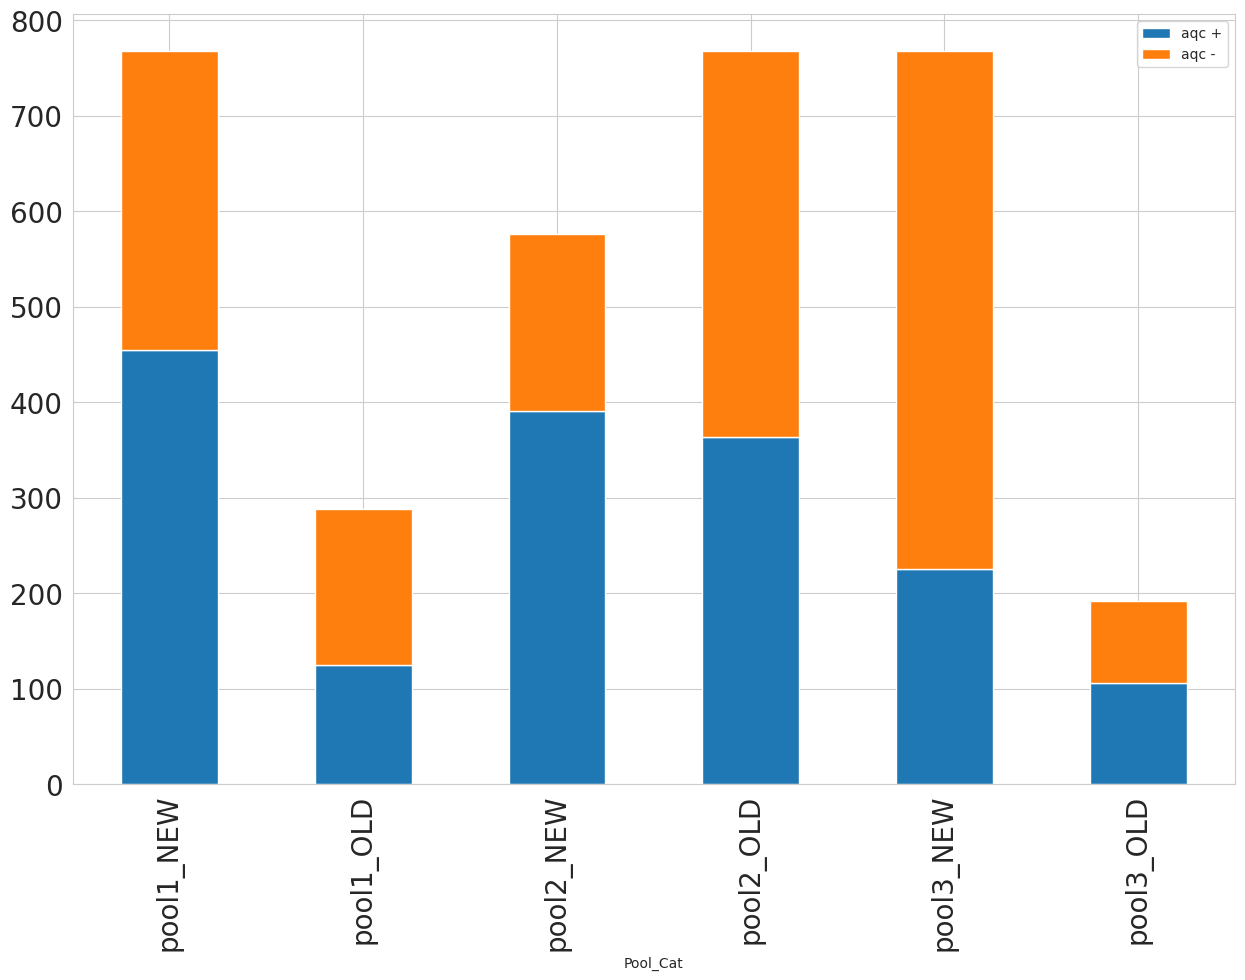

In [7]:
sns.set_style("whitegrid")
sum_cells = list()
concat_df= list()
for e in ldir:
    reformat_e = e.replace("--", "/")
    sample = reformat_e.split('/')[1]
    labels = pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{reformat_e}/cell_selection/labels.tsv", sep="\t")
    good_labels = labels.loc[labels["prediction"] == 1]
    sum_cells.append(good_labels.shape[0])
    concat_df.append(labels)
concat_df = pd.concat(concat_df)
concat_df["Pool_Cat"] = concat_df["sample"].map(d_tmp)
merge_df = pd.merge(
    concat_df.groupby("Pool_Cat")["cell"].nunique().rename("Total").reset_index(),
    concat_df.loc[concat_df["prediction"] == 1].groupby("Pool_Cat")["cell"].nunique().rename("aqc +").reset_index(),
    on="Pool_Cat"
)
merge_df["aqc -"] = merge_df["Total"] - merge_df["aqc +"]
f, ax = plt.subplots(figsize=(15,10))
merge_df[["Pool_Cat", "aqc +", "aqc -"]].set_index("Pool_Cat").plot.bar(stacked=True, ax=ax, fontsize=20)

print(sum(sum_cells))
#concat_df

In [8]:
concat_df

,cell,prediction,probability,sample,Pool_Cat
0,HGSVCxpool1x01PE20401.sort.mdup.bam,0,0.0000,HGSVCxpool1x01,pool1_OLD
1,HGSVCxpool1x01PE20402.sort.mdup.bam,1,0.9791,HGSVCxpool1x01,pool1_OLD
2,HGSVCxpool1x01PE20403.sort.mdup.bam,0,0.0000,HGSVCxpool1x01,pool1_OLD
3,HGSVCxpool1x01PE20404.sort.mdup.bam,0,0.0000,HGSVCxpool1x01,pool1_OLD
4,HGSVCxpool1x01PE20405.sort.mdup.bam,0,0.0000,HGSVCxpool1x01,pool1_OLD
...,...,...,...,...,...
91,HGSVCpool2NEW96wellUVLEDiTRU1A92.sort.mdup.bam,0,0.0272,HGSVCpool2NEW96wellUVLED,pool2_NEW
92,HGSVCpool2NEW96wellUVLEDiTRU1A93.sort.mdup.bam,1,0.5112,HGSVCpool2NEW96wellUVLED,pool2_NEW
93,HGSVCpool2NEW96wellUVLEDiTRU1A94.sort.mdup.bam,1,0.6377,HGSVCpool2NEW96wellUVLED,pool2_NEW
94,HGSVCpool2NEW96wellUVLEDiTRU1A95.sort.mdup.bam,1,0.8291,HGSVCpool2NEW96wellUVLED,pool2_NEW


In [9]:
merge_df

,Pool_Cat,Total,aqc +,aqc -
0,pool1_NEW,768,455,313
1,pool1_OLD,288,125,163
2,pool2_NEW,576,391,185
3,pool2_OLD,768,363,405
4,pool3_NEW,768,225,543
5,pool3_OLD,192,106,86


/tmp/ipykernel_1306819/3484975216.py:55: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


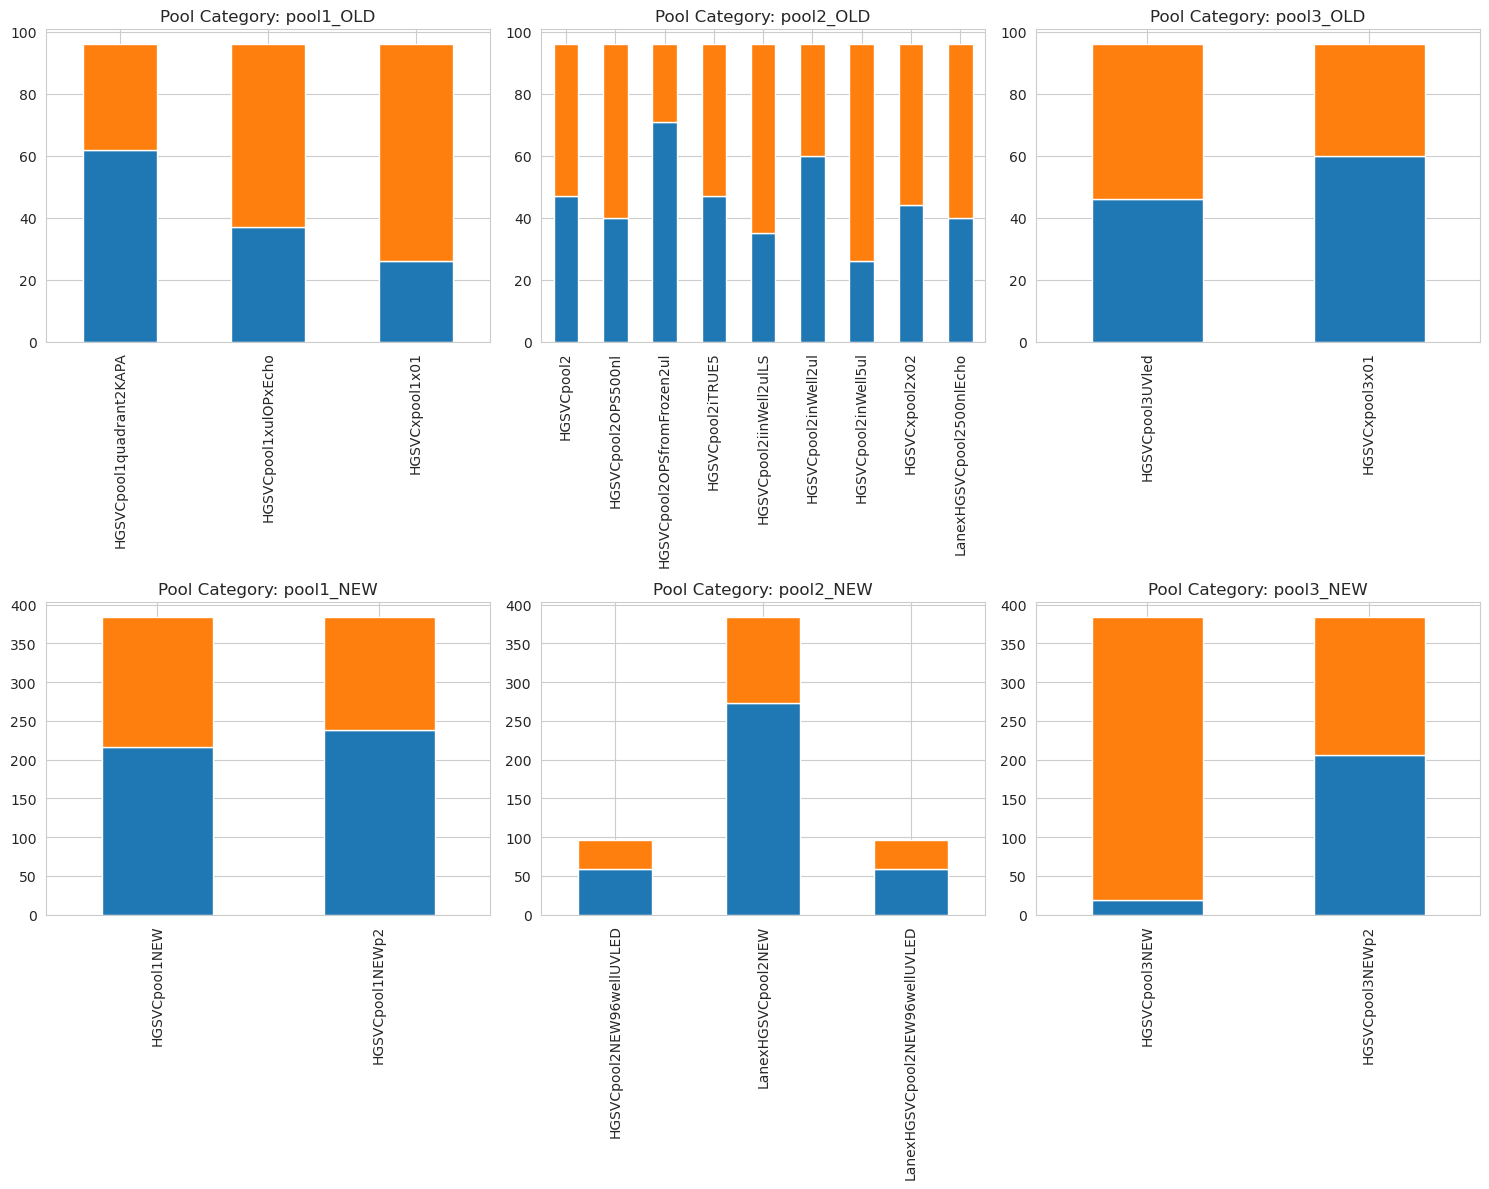

In [67]:
sns.set_style("whitegrid")
sum_cells = list()
concat_df= list()
for e in ldir:
    reformat_e = e.replace("--", "/")
    sample = reformat_e.split('/')[1]
    labels = pd.read_csv(f"/scratch/tweber/DATA/MC_DATA/STOCKS/{reformat_e}/cell_selection/labels.tsv", sep="\t")
    good_labels = labels.loc[labels["prediction"] == 1]
    sum_cells.append(labels.shape[0])
    concat_df.append(labels)
concat_df = pd.concat(concat_df)
concat_df["Pool_Cat"] = concat_df["sample"].map(d_tmp)
merge_df = pd.merge(
    concat_df.groupby("sample")["cell"].nunique().rename("Total").reset_index(),
    concat_df.loc[concat_df["prediction"] == 1].groupby("sample")["cell"].nunique().rename("aqc +").reset_index(),
    on="sample"
)
merge_df["aqc -"] = merge_df["Total"] - merge_df["aqc +"]
merge_df["Pool_Cat"] = merge_df["sample"].map(d_tmp)



# Unique categories in 'Pool_Cat'
pool_cats = merge_df['Pool_Cat'].unique()


import numpy as np
# Calculate the required number of rows for 3 columns
num_categories = len(pool_cats)
num_rows = np.ceil(num_categories / 3).astype(int)


# Setup the matplotlib figure and axes
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 6*num_rows), constrained_layout=True)

pool_cats_ordered = ['pool1_OLD', 'pool2_OLD', 'pool3_OLD', 'pool1_NEW', 'pool2_NEW', 'pool3_NEW']

    
axes = axes.flatten()

for i, cat in enumerate(pool_cats_ordered):
    # Filter the DataFrame for the current category
    df_subset = merge_df[merge_df['Pool_Cat'] == cat]
    
    # Plotting
    df_subset = df_subset.set_index('sample')[['aqc +', 'aqc -']].sort_index()
    df_subset.plot.bar(stacked=True, ax=axes[i], fontsize=10)
    
    # Set title for the subplot
    axes[i].set_title(f'Pool Category: {cat}')
    axes[i].legend().remove()
    axes[i].tick_params(axis='x', rotation=90)# Rotate x-tick labels for better readability
    axes[i].set_xlabel("")

plt.tight_layout()
plt.show()
#print(sum(sum_cells))
#concat_df

In [20]:
sum_cells = list()
concat_df_predict = list()
for e in ldir:
    reformat_e = e.split("--")[1]
    predictions = pd.read_excel(f"{pool_results_folder}/{e}/{reformat_e}_predictions_lite.xlsx")
    concat_df_predict.append(predictions)
    sum_cells.append(predictions.shape[0])
concat_df_predict = pd.concat(concat_df_predict)
print(sum(sum_cells))
#predictions
concat_df_predict.groupby("Pool").nunique()
print(concat_df_predict.loc[concat_df_predict["Trustable"] == True].shape[0])
concat_df_predict= concat_df_predict.groupby("Pool")["Trustable"].value_counts().reset_index().pivot_table(index="Pool", columns="Trustable", values="count").reset_index().fillna(0)
concat_df_predict.columns = [str(e) for e in concat_df_predict.columns]
concat_df_predict["%"] = 100 * (concat_df_predict["True"]) / (concat_df_predict["True"] +concat_df_predict["False"])
concat_df_predict



1701
1659


,Pool,False,True,%
0,HGSVCpool1NEW,5.0,212.0,97.695853
1,HGSVCpool1NEWp2,8.0,230.0,96.638655
2,HGSVCpool1quadrant2KAPA,1.0,61.0,98.387097
3,HGSVCpool1xulOPxEcho,0.0,37.0,100.000000
4,HGSVCpool2,1.0,46.0,97.872340
5,HGSVCpool2NEW96wellUVLED,0.0,59.0,100.000000
6,HGSVCpool2OPS500nl,0.0,40.0,100.000000
7,HGSVCpool2OPSfromFrozen2ul,0.0,71.0,100.000000
8,HGSVCpool2iTRUE5,1.0,46.0,97.872340
9,HGSVCpool2iinWell2ulLS,0.0,35.0,100.000000


In [21]:
concat_df_predict_perc = concat_df_predict.copy()
concat_df_predict_perc["False"] = 100 * (concat_df_predict_perc["False"] / (concat_df_predict_perc["False"] + concat_df_predict_perc["True"]))
concat_df_predict_perc["True"] = 100 * (concat_df_predict_perc["True"] / (concat_df_predict_perc["False"] + concat_df_predict_perc["True"]))
concat_df_predict_perc["Pool_Cat"] = concat_df_predict_perc["Pool"].map(d_tmp)
concat_df_predict_perc


,Pool,False,True,%,Pool_Cat
0,HGSVCpool1NEW,2.304147,98.924824,97.695853,pool1_NEW
1,HGSVCpool1NEWp2,3.361345,98.559597,96.638655,pool1_NEW
2,HGSVCpool1quadrant2KAPA,1.612903,97.424008,98.387097,pool1_OLD
3,HGSVCpool1xulOPxEcho,0.000000,100.000000,100.000000,pool1_OLD
4,HGSVCpool2,2.127660,95.579134,97.872340,pool2_OLD
5,HGSVCpool2NEW96wellUVLED,0.000000,100.000000,100.000000,pool2_NEW
6,HGSVCpool2OPS500nl,0.000000,100.000000,100.000000,pool2_OLD
7,HGSVCpool2OPSfromFrozen2ul,0.000000,100.000000,100.000000,pool2_OLD
8,HGSVCpool2iTRUE5,2.127660,95.579134,97.872340,pool2_OLD
9,HGSVCpool2iinWell2ulLS,0.000000,100.000000,100.000000,pool2_OLD


In [14]:
sum_cells = list()
concat_df_predict = list()
for e in ldir:
    reformat_e = e.split("--")[1]
    predictions = pd.read_excel(f"{pool_results_folder}/{e}/{reformat_e}_predictions_with_metrics.xlsx")
    predictions.columns = ["cell"] + predictions.loc[0].values.tolist()[1:]
    predictions = predictions.drop([0, 1], axis=0).reset_index(drop=True)
    predictions["Pool_Cat"] = predictions["Pool"].map(d_tmp)
    concat_df_predict.append(predictions)
    
#    sum_cells.append(predictions.shape[0])
concat_df_predict = pd.concat(concat_df_predict)
#print(sum(sum_cells))
##predictions
#concat_df_predict.groupby("Pool").nunique()
#print(concat_df_predict.loc[concat_df_predict["Trustable"] == True].shape[0])
#concat_df_predict= concat_df_predict.groupby("Pool")["Trustable"].value_counts().reset_index().pivot_table(index="Pool", columns="Trustable", values="count").reset_index().fillna(0)
#concat_df_predict.columns = [str(e) for e in concat_df_predict.columns]
#concat_df_predict["%"] = 100 * (concat_df_predict["True"]) / (concat_df_predict["True"] +concat_df_predict["False"])
#concat_df_predict

concat_df_predict

,cell,Pool,1KG_identified_sample,z-score_value,SNP_nb,Trustable,prediction,probability,sample,medbin,...,dupl,mapq,read2,good,pass1,nb_p,nb_r,nb_a,bam,Pool_Cat
0,402,HGSVCxpool1x01,HG04115,5.952558,19,True,1,0.9791,HGSVCxpool1x01,10,...,2163930,124826,160300,162993,1,0.137911,1.78291,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-07-29...,pool1_OLD
1,406,HGSVCxpool1x01,HG00766,5.986672,15,True,1,0.9187,HGSVCxpool1x01,6,...,1853806,86261,111126,112270,1,0.137911,1.23111,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-07-29...,pool1_OLD
2,409,HGSVCxpool1x01,HG00735,5.668664,7,True,1,0.8525,HGSVCxpool1x01,3,...,1010908,41726,65230,65735,1,0.137911,0.721017,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-07-29...,pool1_OLD
3,411,HGSVCxpool1x01,HG04115,6.0,9,True,1,0.8471,HGSVCxpool1x01,3,...,1019865,49426,63471,63881,1,0.137911,0.700298,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-07-29...,pool1_OLD
4,423,HGSVCxpool1x01,NA20128,5.985954,28,True,1,0.9346,HGSVCxpool1x01,6,...,1784518,74876,107611,108894,1,0.137911,1.19365,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2021-07-29...,pool1_OLD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,1A90,HGSVCpool2NEW96wellUVLED,HG02410,6.074267,78,True,1,0.8096,HGSVCpool2NEW96wellUVLED,39,...,724966,133110,556494,571442,1,0.293152,16.3942,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-02-05...,pool2_NEW
55,1A91,HGSVCpool2NEW96wellUVLED,NA19734,6.063612,52,True,1,0.8651,HGSVCpool2NEW96wellUVLED,30,...,478061,102874,435669,446856,1,0.293152,12.8427,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-02-05...,pool2_NEW
56,1A93,HGSVCpool2NEW96wellUVLED,HG03809,6.078228,100,True,1,0.5112,HGSVCpool2NEW96wellUVLED,31,...,393399,91570,435914,446684,1,0.293152,12.8322,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-02-05...,pool2_NEW
57,1A94,HGSVCpool2NEW96wellUVLED,HG02079,6.076565,74,True,1,0.6377,HGSVCpool2NEW96wellUVLED,34,...,441833,105906,484329,496285,1,0.293152,14.2294,0.1,/scratch/tweber/DATA/MC_DATA/STOCKS/2024-02-05...,pool2_NEW


In [15]:
concat_df_predict_lite = concat_df_predict[["Pool_Cat", "Pool", "Trustable", "mapped", "good", "probability", "dupl", "SNP_nb"]]
concat_df_predict_lite

,Pool_Cat,Pool,Trustable,mapped,good,probability,dupl,SNP_nb
0,pool1_OLD,HGSVCxpool1x01,True,2613927,162993,0.9791,2163930,19
1,pool1_OLD,HGSVCxpool1x01,True,2164655,112270,0.9187,1853806,15
2,pool1_OLD,HGSVCxpool1x01,True,1184621,65735,0.8525,1010908,7
3,pool1_OLD,HGSVCxpool1x01,True,1197537,63881,0.8471,1019865,9
4,pool1_OLD,HGSVCxpool1x01,True,2077354,108894,0.9346,1784518,28
...,...,...,...,...,...,...,...,...
54,pool2_NEW,HGSVCpool2NEW96wellUVLED,True,1986912,571442,0.8096,724966,78
55,pool2_NEW,HGSVCpool2NEW96wellUVLED,True,1464170,446856,0.8651,478061,52
56,pool2_NEW,HGSVCpool2NEW96wellUVLED,True,1368206,446684,0.5112,393399,100
57,pool2_NEW,HGSVCpool2NEW96wellUVLED,True,1529131,496285,0.6377,441833,74


Text(0, 0.5, 'Usable reads by MC')

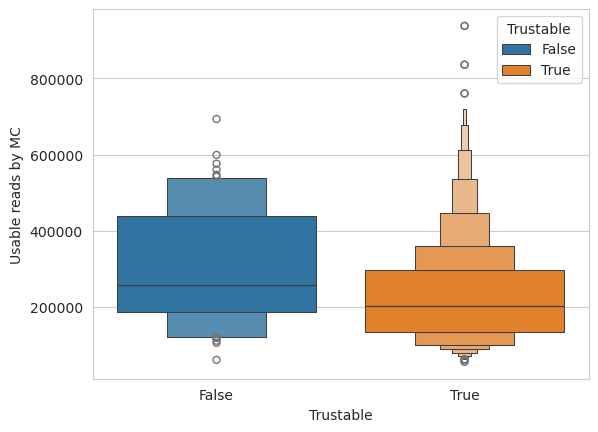

In [16]:
ax = sns.boxenplot(data=concat_df_predict_lite, x="Trustable", y="good", hue="Trustable")
ax.set_ylabel('Usable reads by MC')


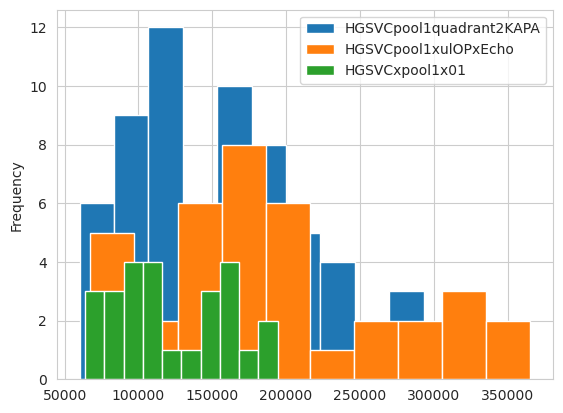

In [57]:
pivot = df_subset[['Pool', 'good']].pivot(columns="Pool", values="good").reset_index(drop=True)
for col in pivot.columns:
    pivot[col].plot.hist()
plt.legend()
    

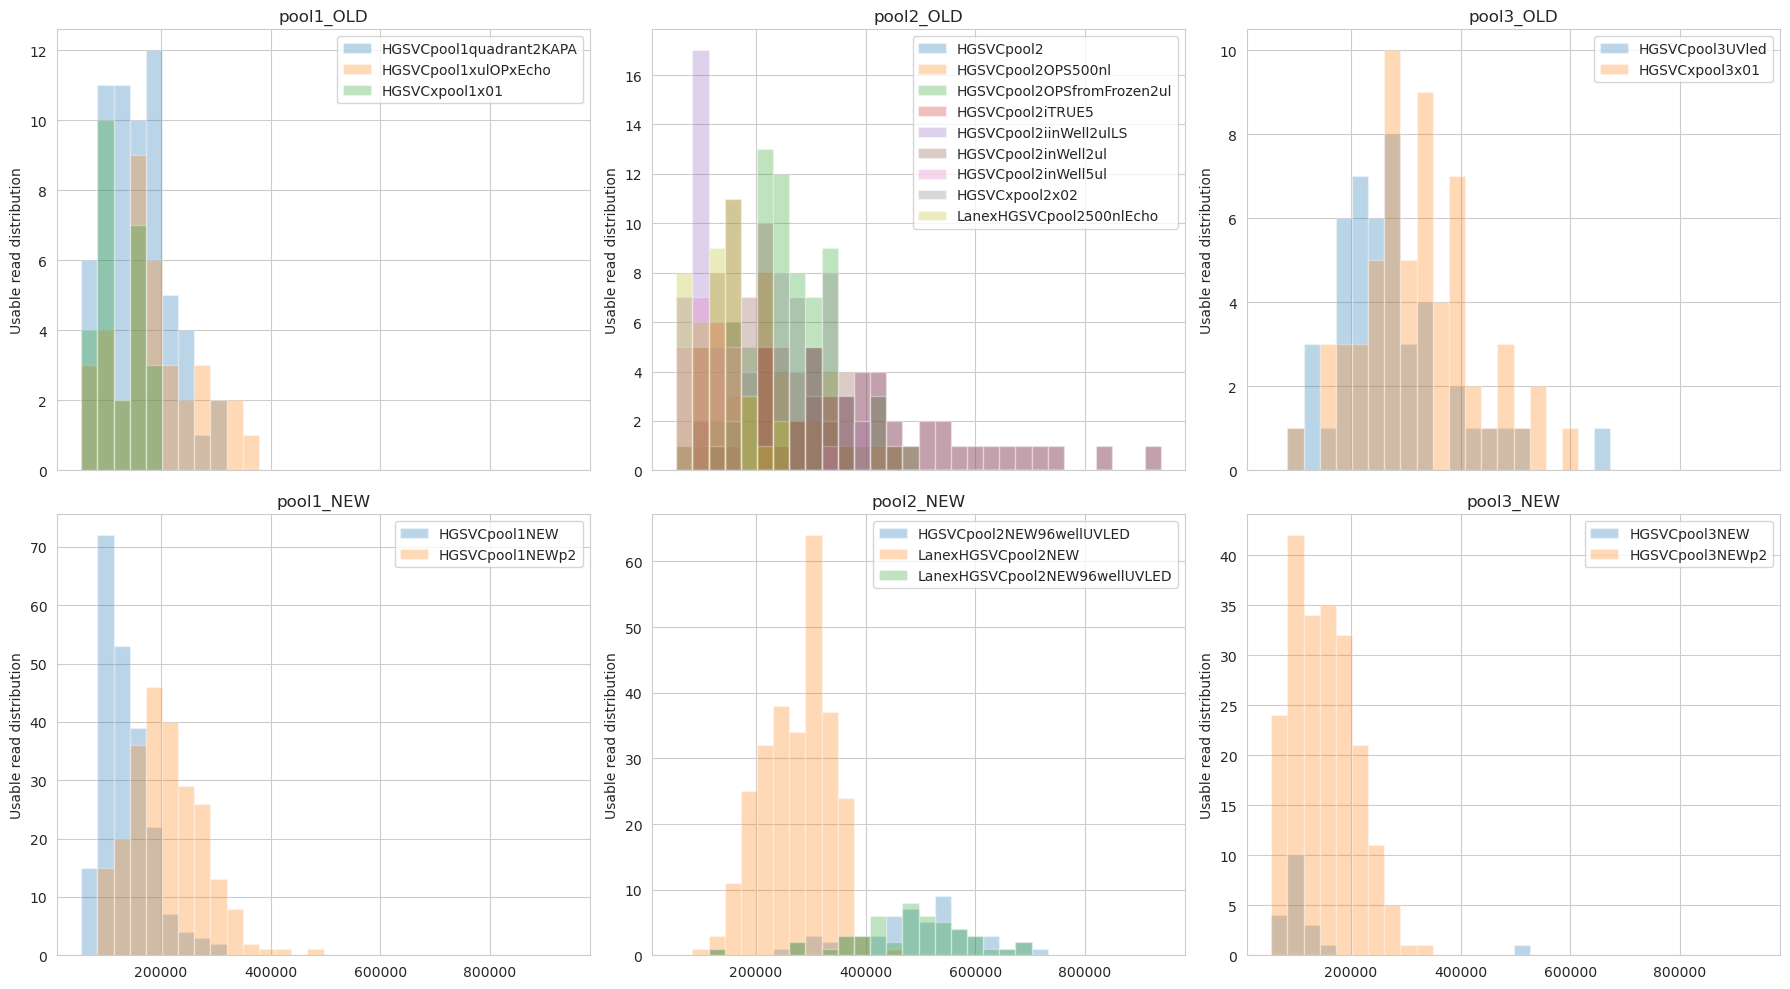

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming concat_df_predict_lite is your DataFrame

# Manually define the order of Pool_Cat values
pool_cats_ordered = ['pool1_OLD', 'pool2_OLD', 'pool3_OLD', 'pool1_NEW', 'pool2_NEW', 'pool3_NEW']


# Determine the global min and max values for 'good' across all subsets
global_min = concat_df_predict_lite['good'].min()
global_max = concat_df_predict_lite['good'].max()

# Define consistent bin edges based on the global range
num_bins = 30
bin_edges = np.linspace(global_min, global_max, num_bins + 1)


# Colors for True and False
colors = {'True': '#16a085',  # dimmed green
          'False': '#c0392b'}  # dimmed red

# Create a figure with 6 subplots (adjust the layout as needed)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=False, sharex=True)
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, pool_cat in enumerate(pool_cats_ordered):
    # Filter data for the current Pool_Cat
    df_subset = concat_df_predict_lite[concat_df_predict_lite['Pool_Cat'] == pool_cat]
    
    # Check if the current category has any data to plot
    if not df_subset.empty:
        # Plotting the stacked bar plot for the current Pool_Cat
        pivot = df_subset[['Pool', 'good']].pivot(columns="Pool", values="good").reset_index(drop=True)
        for col in pivot.columns:
            pivot[col].plot.hist(ax=axes[i], bins=bin_edges, alpha=0.3, histtype="barstacked")
    
        axes[i].set_title(f'{pool_cat}')
#        axes[i].set_xlabel('')
        axes[i].set_ylabel('Usable read distribution')
#        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better readability
        axes[i].legend(loc="upper right")
    else:
        axes[i].set_visible(False)  # Hide the axis if there's no data for the category

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


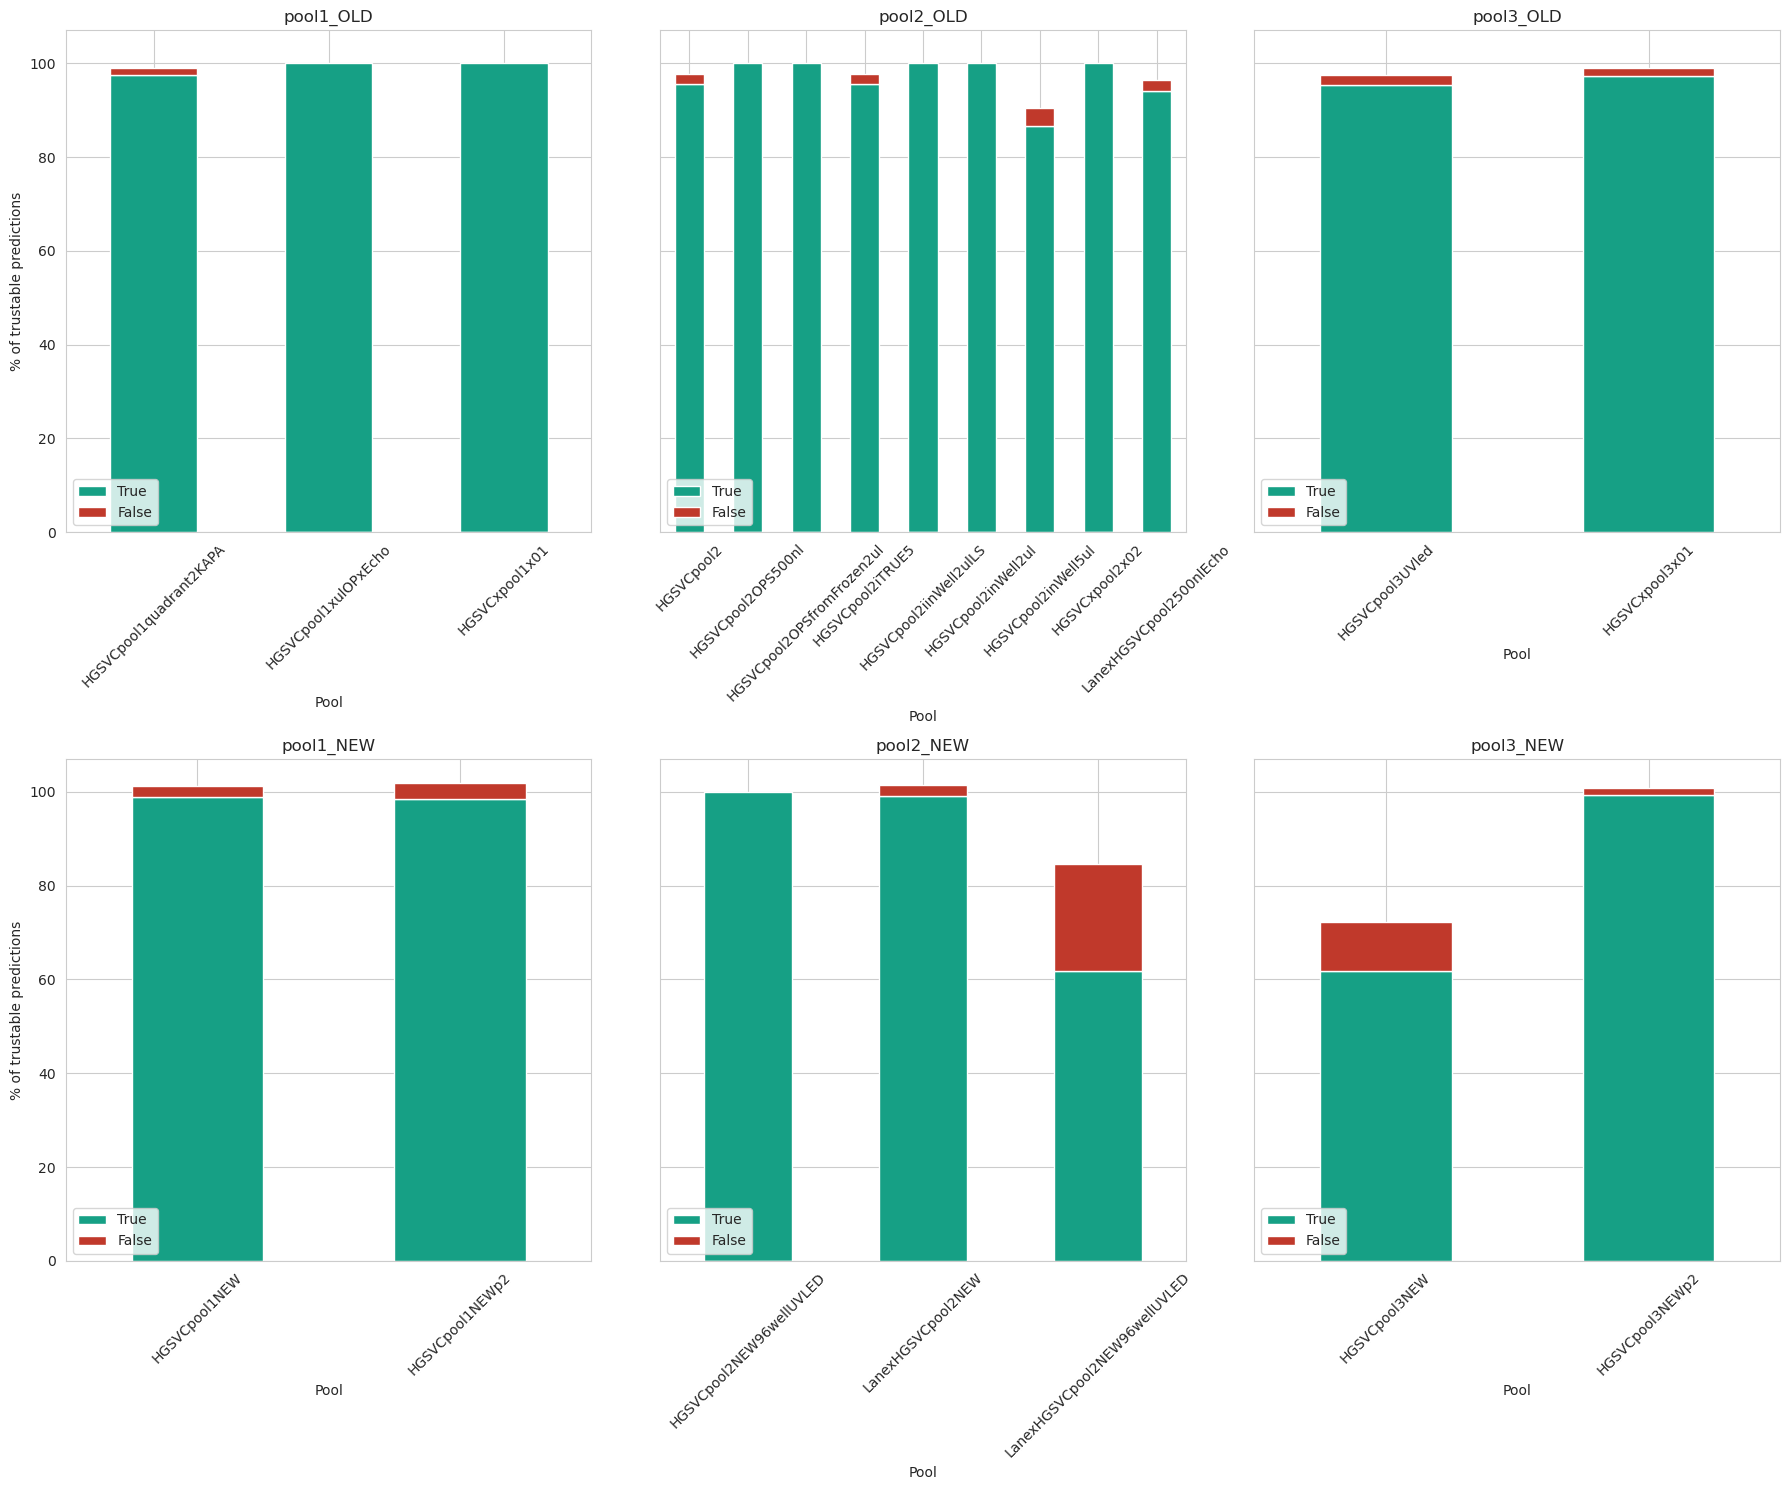

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming concat_df_predict_perc is your DataFrame

# Manually define the order of Pool_Cat values
pool_cats_ordered = ['pool1_OLD', 'pool2_OLD', 'pool3_OLD', 'pool1_NEW', 'pool2_NEW', 'pool3_NEW']

# Colors for True and False
colors = {'True': '#16a085',  # dimmed green
          'False': '#c0392b'}  # dimmed red

# Create a figure with 6 subplots (adjust the layout as needed)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy indexing

for i, pool_cat in enumerate(pool_cats_ordered):
    # Filter data for the current Pool_Cat
    df_subset = concat_df_predict_perc[concat_df_predict_perc['Pool_Cat'] == pool_cat]
    
    # Check if the current category has any data to plot
    if not df_subset.empty:
        # Plotting the stacked bar plot for the current Pool_Cat
        df_subset[['Pool', 'True', 'False']].set_index('Pool').plot.bar(stacked=True, color=colors, ax=axes[i], fontsize=10)
        axes[i].set_title(f'{pool_cat}')
        axes[i].set_xlabel('Pool')
        axes[i].set_ylabel('% of trustable predictions')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better readability
        axes[i].legend(loc="lower left")
    else:
        axes[i].set_visible(False)  # Hide the axis if there's no data for the category

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


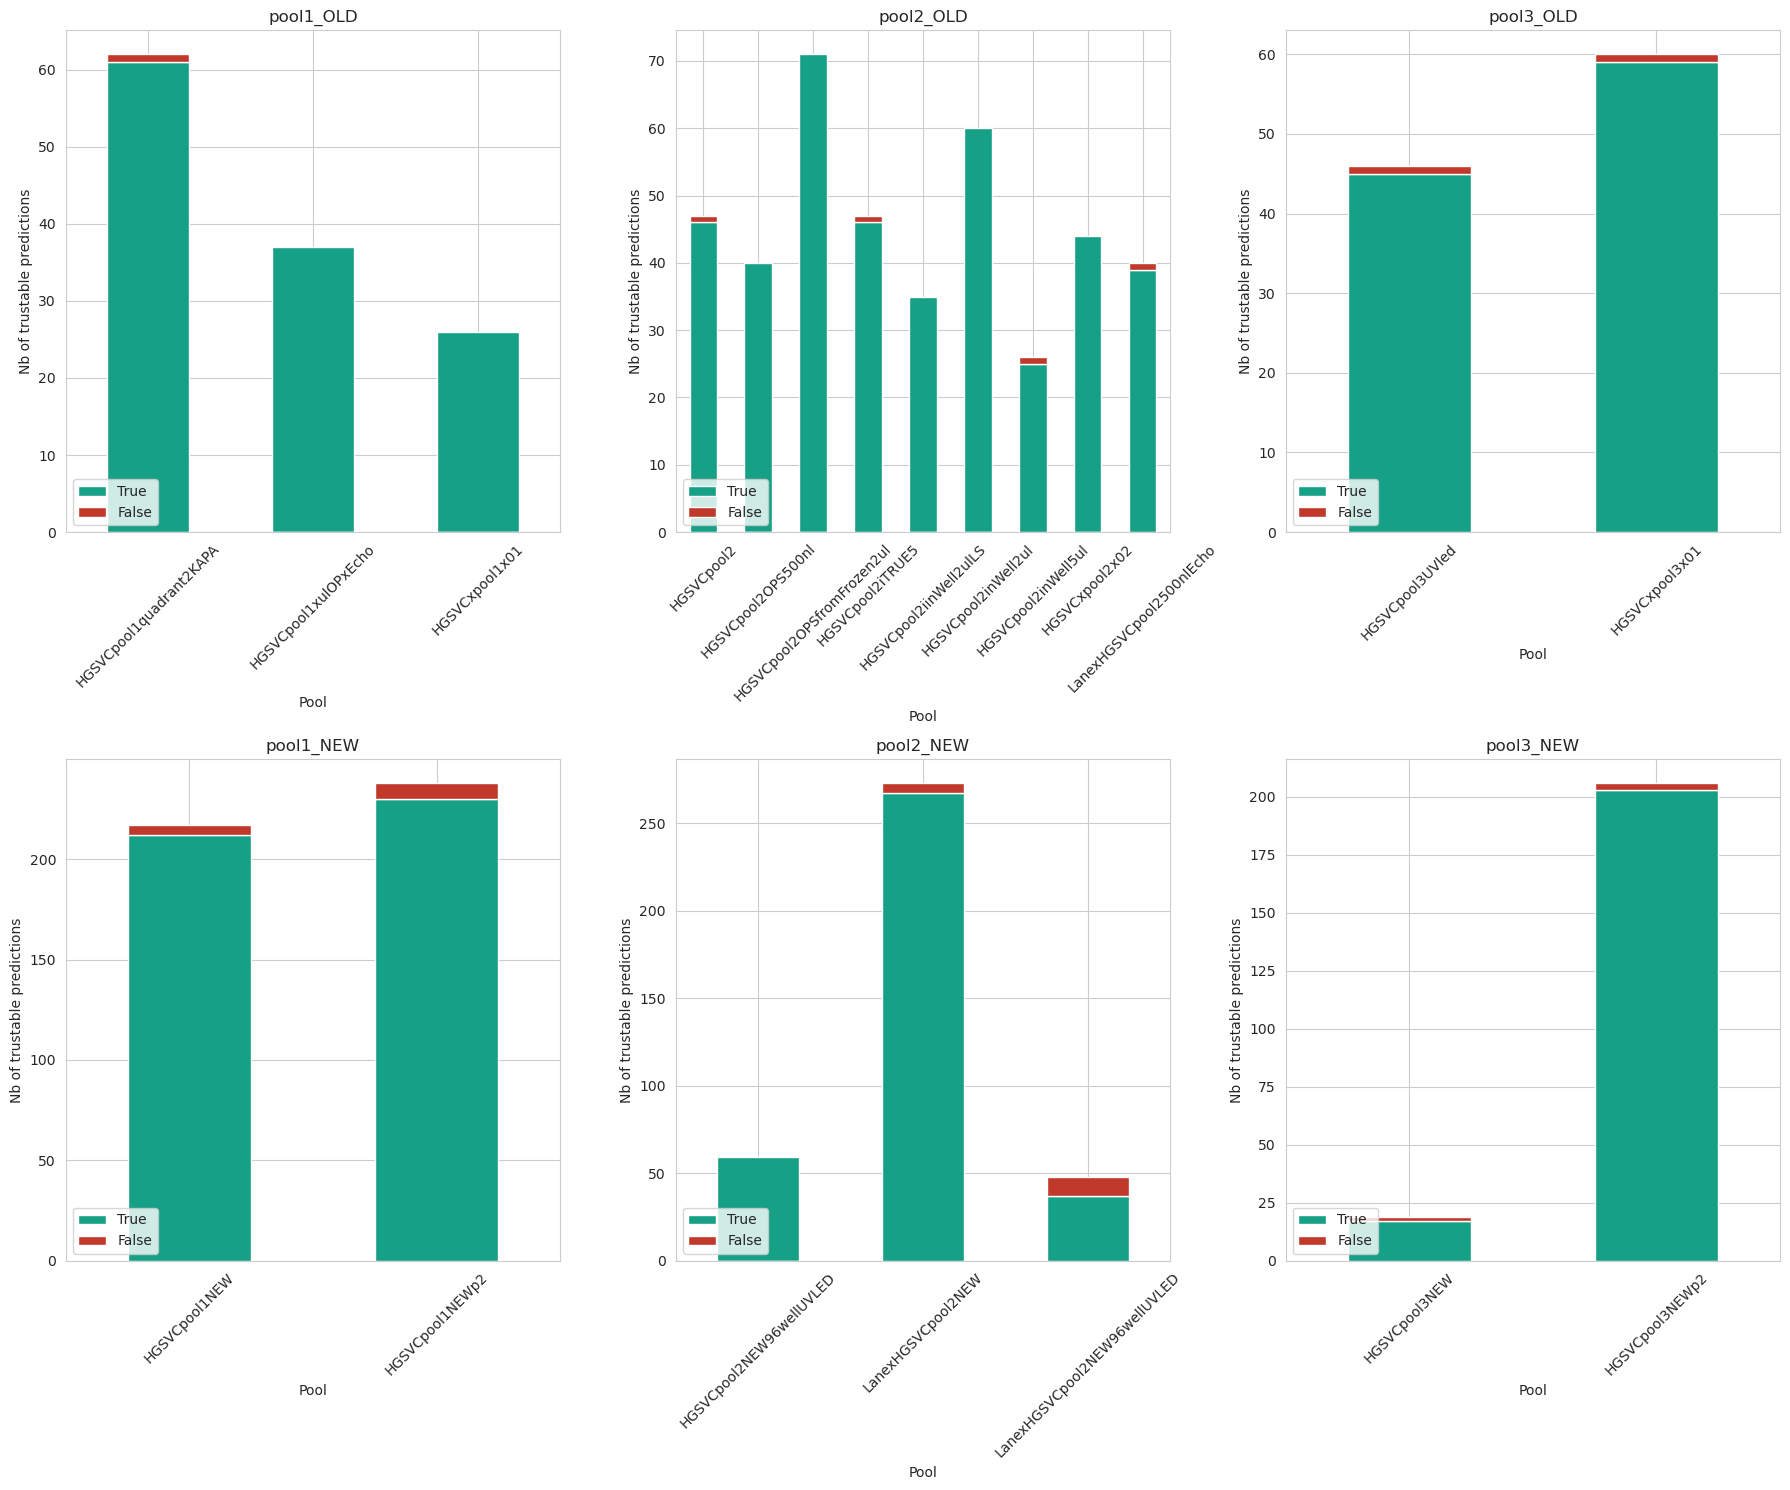

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming concat_df_predict_perc is your DataFrame

# Manually define the order of Pool_Cat values
pool_cats_ordered = ['pool1_OLD', 'pool2_OLD', 'pool3_OLD', 'pool1_NEW', 'pool2_NEW', 'pool3_NEW']

# Colors for True and False
colors = {'True': '#16a085',  # dimmed green
          'False': '#c0392b'}  # dimmed red

# Create a figure with 6 subplots (adjust the layout as needed)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 15))
axes = axes.flatten()  # Flatten the axes array for easy indexing

concat_df_predict["Pool_Cat"] = concat_df_predict["Pool"].map(d_tmp)

for i, pool_cat in enumerate(pool_cats_ordered):
    # Filter data for the current Pool_Cat
    df_subset = concat_df_predict[concat_df_predict['Pool_Cat'] == pool_cat]
    
    # Check if the current category has any data to plot
    if not df_subset.empty:
        # Plotting the stacked bar plot for the current Pool_Cat
        df_subset[['Pool', 'True', 'False']].set_index('Pool').plot.bar(stacked=True, color=colors, ax=axes[i], fontsize=10)
        axes[i].set_title(f'{pool_cat}')
        axes[i].set_xlabel('Pool')
        axes[i].set_ylabel('Nb of trustable predictions')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-tick labels for better readability
        axes[i].legend(loc="lower left")
    else:
        axes[i].set_visible(False)  # Hide the axis if there's no data for the category

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [23]:
pool_list = list()
#k = "pool1_OLD"

for k in d:
    for e in d[k]:
        tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/cell_count_by_sample_and_superpop_DATA.csv", sep="\t")
        tmp_df["PoolID"] = k
        tmp_df["PoolDataset"] = e
        pool_list.append(tmp_df)
df = pd.concat(pool_list)

df.loc[df["SampleID"] == "HG04115", "color"] = "(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)"
df = df.loc[~df["SampleID"].isin(["HG01453", "HG04128"])]
df.loc[df["PoolID"].str.contains("NEW"), "PoolNewOld"] = "NEW"
df.loc[~df["PoolID"].str.contains("NEW"), "PoolNewOld"] = "OLD"

df = df.groupby(["PoolNewOld", "SampleID", "Superpopulation", "color"])["cell"].sum().reset_index()
# Find all unique Superpopulations and Datasets
unique_superpopulations = df['Superpopulation'].unique()
unique_datasets = df['PoolNewOld'].unique()

# Generate a list of colors and hatches
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]
hatch_patterns = ["", "///",]

# Create a color dictionary and a hatch dictionary
color_dict = dict(zip(unique_superpopulations, colors))
hatch_dict = dict(zip(unique_datasets, hatch_patterns))

# Add a color and hatch column to the dataframe based on 'Superpopulation' and 'Dataset'
#df['color'] = df['Superpopulation'].map(color_dict)
df['hatch'] = df['PoolNewOld'].map(hatch_dict)

df['color'] = df['color'].apply(ast.literal_eval)

# Sort df if necessary
df = df.sort_values(by=["Superpopulation", "SampleID"])

df

,PoolNewOld,SampleID,Superpopulation,color,cell,hatch
41,NEW,HG01879,AFR,"(0.12156862745098039, 0.4666666666666667, 0.70...",4,
156,OLD,HG01881,AFR,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,///
157,OLD,HG01884,AFR,"(0.12156862745098039, 0.4666666666666667, 0.70...",0,///
158,OLD,HG01887,AFR,"(0.12156862745098039, 0.4666666666666667, 0.70...",23,///
42,NEW,HG01890,AFR,"(0.12156862745098039, 0.4666666666666667, 0.70...",40,
...,...,...,...,...,...,...
254,OLD,NA20869,SAS,"(0.17254901960784313, 0.6274509803921569, 0.17...",0,///
255,OLD,NA20869,SAS,"(1.0, 0.7333333333333333, 0.47058823529411764)",0,///
122,NEW,NA20885,SAS,"(0.17254901960784313, 0.6274509803921569, 0.17...",10,
123,NEW,NA21099,SAS,"(0.17254901960784313, 0.6274509803921569, 0.17...",1,


In [96]:
import yaml
file_path = "pools_composition.yaml"
reference_sample_list = yaml.safe_load(open(file_path, "r"))
complete_list = [sub_e for k,v in reference_sample_list.items() for sub_e in v]
len(complete_list)

235

In [110]:
df_gb.loc[df_gb["cell"] >= 3].PoolNewOld.value_counts()

PoolNewOld
NEW    94
OLD    39
Name: count, dtype: int64

In [102]:
df[["PoolNewOld", "hatch"]].drop_duplicates().set_index("PoolNewOld").to_dict(orient="index")

{'NEW': {'hatch': '///'}, 'OLD': {'hatch': ''}}

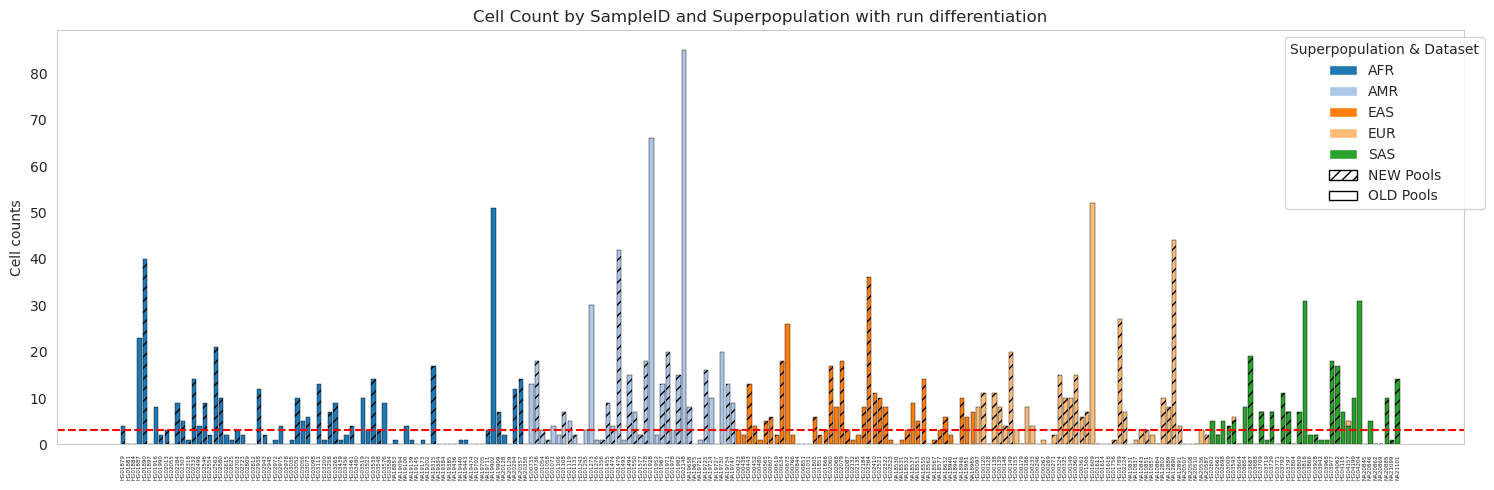

In [108]:
from matplotlib.patches import Patch

plt.style.use("fast")
plt.figure(figsize=(15,5))

ax = plt.gca()  # Get the current axes instance

# Ensure the axes background is white
ax.set_facecolor('white')

# Optionally, ensure the figure background is white
plt.gcf().set_facecolor('white')


# Create a set to keep track of labels already added to the legend
seen_labels = set()
#hatch_patterns = ["",  '///', '----',  'o', "*", "xxx"]

# Assuming 'Dataset' column exists and is used for hatches. If not, adjust as needed.
datasets = df['PoolNewOld'].unique()
hatch_dict = df[["PoolNewOld", "hatch"]].drop_duplicates().set_index("PoolNewOld").to_dict(orient="index")
df_gb = df.groupby(["PoolNewOld", "SampleID", "Superpopulation", "color", "hatch"])["cell"].sum().reset_index()
#df_gb = df_gb.loc[df_gb["cell"] > 0].sort_values(by=["cell", "Superpopulation", "SampleID"], ascending=[False, True, True])


#df_gb = df_gb.sort_values(by=["cell", "Superpopulation", "SampleID"], ascending=[False, True, True])
df_gb = df_gb.sort_values(by=["Superpopulation", "SampleID"])


# Initialize a dictionary to keep track of the cumulative heights for each SampleID
cumulative_heights = dict.fromkeys(df['SampleID'].unique(), 0)

# Loop through each row in the DataFrame to plot
for (i, row) in df_gb.iterrows():
    # Extract necessary info from the row
    sample_id = row['SampleID']
    cell_value = row['cell']
    color = row['color']
    label = row['Superpopulation'] if row['Superpopulation'] not in seen_labels else ""
    hatch = row['hatch']  # Assuming 'hatch' is correctly determined before this loop

    # Determine the bottom position for the current bar
    bottom_position = cumulative_heights[sample_id]

    # Plot the bar
    ax.bar(sample_id, cell_value, bottom=bottom_position, color=color, edgecolor="black", hatch=hatch, label=label, linewidth=0.3)

    # Update the cumulative height for the current SampleID
    cumulative_heights[sample_id] += cell_value

    
# Custom legend for superpopulations
legend_elements_superpop = [Patch(facecolor=color_dict[sp], label=sp) for sp in unique_superpopulations]

# Custom legend for datasets using hatches
legend_elements_dataset = [Patch(facecolor='white', edgecolor='black', hatch=hatch_dict[ds]["hatch"], label=f"{ds} Pools") for ds in datasets]

# Combine the legends
plt.axhline(3, color="red", ls="--")
plt.legend(handles=legend_elements_superpop + legend_elements_dataset, title='Superpopulation & Dataset', bbox_to_anchor=(1.02, 1))
plt.xticks(fontsize=4, rotation=90)
plt.ylabel('Cell counts')
#plt.ylabel('Cell count')
plt.yticks(rotation=0)
plt.title(f'Cell Count by SampleID and Superpopulation with run differentiation')
plt.tight_layout()
plt.grid(False)
#plt.savefig(f"{output_dir}/{k}/cell_count_by_sample_and_superpop.png")


plt.show()

In [26]:
pool_list = list()
#k = "pool1_OLD"

for k in d:
    for e in d[k]:
        tmp_df = pd.read_csv(f"{pool_results_folder}/{e}/cell_count_by_sample_and_superpop_DATA.csv", sep="\t")
        tmp_df["PoolID"] = k
        tmp_df["PoolDataset"] = e
        pool_list.append(tmp_df)
df = pd.concat(pool_list)

df.loc[df["SampleID"] == "HG04115", "color"] = "(0.17254901960784313, 0.6274509803921569, 0.17254901960784313)"
df = df.loc[~df["SampleID"].isin(["HG01453", "HG04128"])]
df.loc[df["PoolID"].str.contains("NEW"), "PoolNewOld"] = "NEW"
df.loc[~df["PoolID"].str.contains("NEW"), "PoolNewOld"] = "OLD"


# Find all unique Superpopulations and Datasets
unique_superpopulations = df['Superpopulation'].unique()
unique_datasets = df['PoolNewOld'].unique()

# Generate a list of colors and hatches
colors = plt.cm.tab20.colors[:len(unique_superpopulations)]
hatch_patterns = ["", "///",]

# Create a color dictionary and a hatch dictionary
color_dict = dict(zip(unique_superpopulations, colors))
hatch_dict = dict(zip(unique_datasets, hatch_patterns))

# Add a color and hatch column to the dataframe based on 'Superpopulation' and 'Dataset'
#df['color'] = df['Superpopulation'].map(color_dict)
df['hatch'] = df['PoolNewOld'].map(hatch_dict)

df['color'] = df['color'].apply(ast.literal_eval)

# Sort df if necessary
df = df.sort_values(by=["Superpopulation", "SampleID"])

df

,Superpopulation,SampleID,cell,color,PoolID,PoolDataset,PoolNewOld,hatch
0,AFR,HG01879,3,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool1_NEW,2023-11-09-HW5NFAFX5--HGSVCpool1NEW,NEW,///
0,AFR,HG01879,1,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool1_NEW,2024-01-30-AACT75KM5--HGSVCpool1NEWp2,NEW,///
0,AFR,HG01881,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool1_OLD,2021-07-29-HWYJ2AFX2--HGSVCxpool1x01,OLD,
0,AFR,HG01881,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool1_OLD,2022-11-15-H33JMAFX5--HGSVCpool1xulOPxEcho,OLD,
0,AFR,HG01881,0,"(0.12156862745098039, 0.4666666666666667, 0.70...",pool1_OLD,2022-11-25-H37MNAFX5--HGSVCpool1quadrant2KAPA,OLD,
...,...,...,...,...,...,...,...,...
37,SAS,NA20885,1,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2024-01-29-H33YJAFX7--LanexHGSVCpool2NEW96well...,NEW,///
37,SAS,NA20885,1,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool2_NEW,2024-02-05-H33YHAFX7--HGSVCpool2NEW96wellUVLED,NEW,///
36,SAS,NA21099,1,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool1_NEW,2023-11-09-HW5NFAFX5--HGSVCpool1NEW,NEW,///
37,SAS,NA21101,6,"(0.17254901960784313, 0.6274509803921569, 0.17...",pool1_NEW,2023-11-09-HW5NFAFX5--HGSVCpool1NEW,NEW,///


In [29]:
df.groupby("PoolID")["cell"].sum()

PoolID
pool1_NEW    455
pool1_OLD    125
pool2_NEW    380
pool2_OLD    410
pool3_NEW    225
pool3_OLD    106
Name: cell, dtype: int64

In [ ]:
df.loc[df["PoolID"] == "pool1_OLD"]["SampleID"].nunique()

{'HGSVCpool1NEW': '', 'HGSVCpool1NEWp2': '///'}
pool1_NEW 36
{'LanexHGSVCpool2NEW': '', 'LanexHGSVCpool2NEW96wellUVLED': '///', 'HGSVCpool2NEW96wellUVLED': '***'}
pool2_NEW 32


/tmp/ipykernel_1306819/1226313797.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation=90)
/tmp/ipykernel_1306819/1226313797.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation=90)


{'HGSVCpool3NEW': '', 'HGSVCpool3NEWp2': '///'}
pool3_NEW 26


/tmp/ipykernel_1306819/1226313797.py:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels( ax.get_xticklabels(), rotation=90)


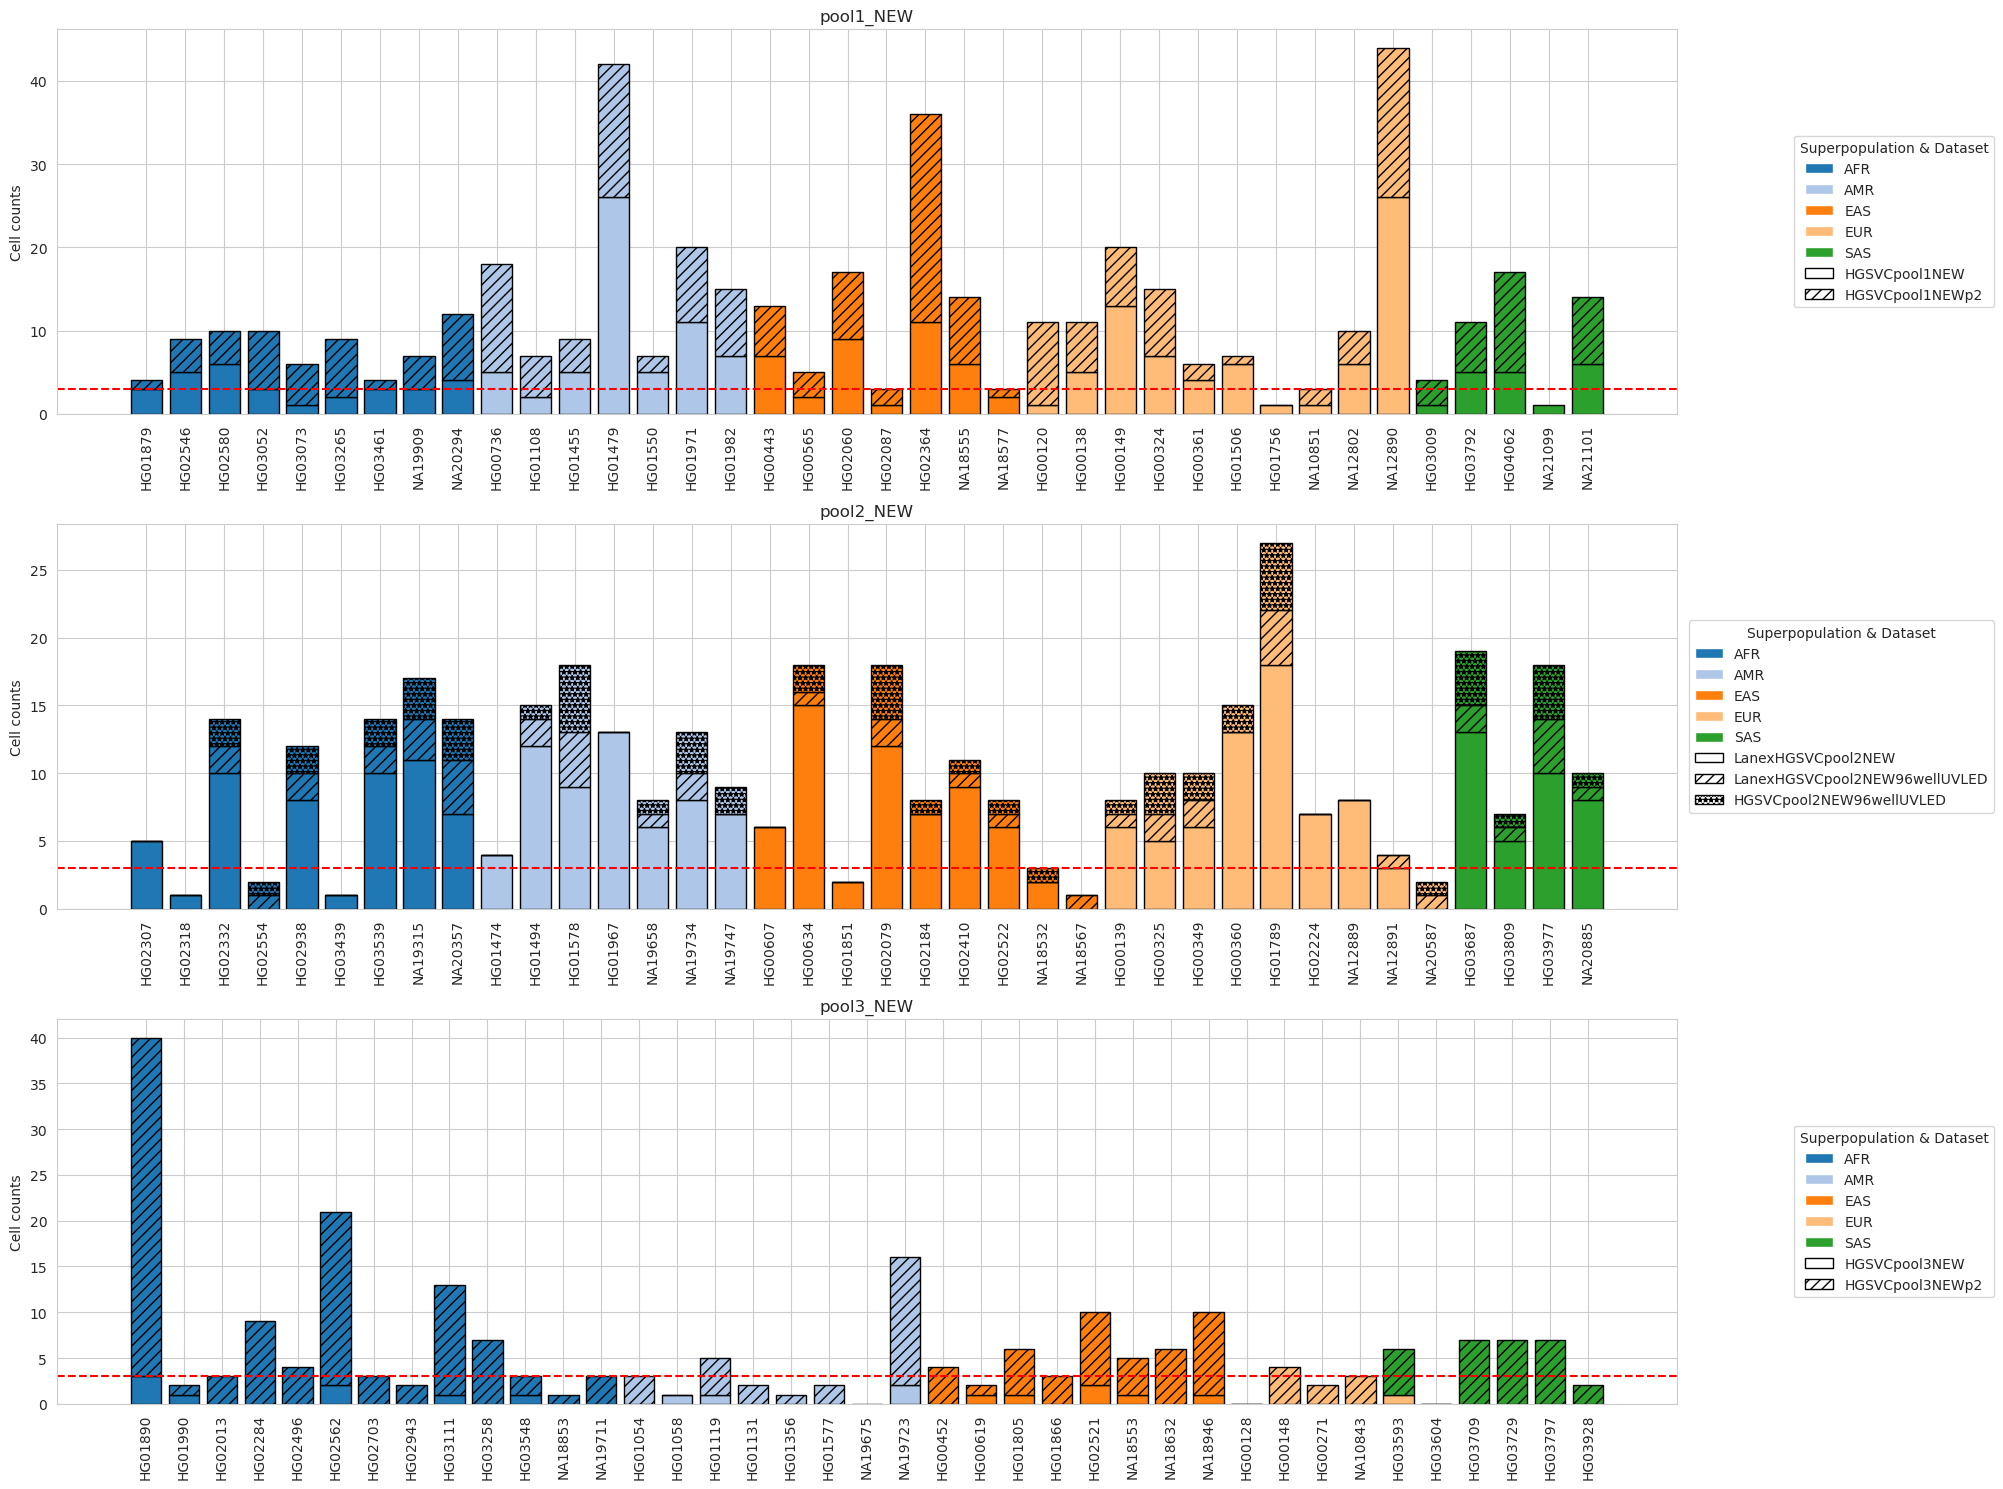

In [71]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Assuming df is your DataFrame and it contains 'Pool_Cat', 'PoolID', 'Superpopulation', 'SampleID', 'cell', and 'color' columns
# Ensure 'hatch_patterns' and 'color_dict' are defined as needed

# Unique Pool_Cat values
pool_cats = sorted([e for e in df['PoolID'].unique().tolist() if "OLD" not in e ])

n_cats = len(pool_cats)


# Create figure with subplots for each Pool_Cat
fig, axes = plt.subplots(n_cats, 1, figsize=(20, 5 * n_cats), sharex=False)  # Adjust height as needed

if n_cats == 1:  # If there's only one category, wrap axes in a list
    axes = [axes]

for ax, pool_cat in zip(axes, pool_cats[:n_cats]):
    df_subset = df[df['PoolID'] == pool_cat].sort_values(by=["Superpopulation", "SampleID"])
    seen_labels = set()
    

    # Find all unique Superpopulations and Datasets
    unique_superpopulations = df_subset['Superpopulation'].unique()
    df_subset["Dataset_lite"] = df_subset["PoolDataset"].apply(lambda r: r.split("--")[1])
    unique_datasets = df_subset['Dataset_lite'].unique()
    
    # Generate a list of colors and hatches
    colors = plt.cm.tab20.colors[:len(unique_superpopulations)]
    hatch_patterns = ["", "///", "***", "---", "ooo", "OOO", "+++", "\\\\\\", "|||"]

    # Create a color dictionary and a hatch dictionary
    color_dict = dict(zip(unique_superpopulations, colors))
    hatch_dict = dict(zip(unique_datasets, hatch_patterns[:len(unique_datasets)]))
    print(hatch_dict)

    # Add a color and hatch column to the dataframe based on 'Superpopulation' and 'Dataset'
    #df['color'] = df['Superpopulation'].map(color_dict)
    df_subset['hatch'] = df_subset['Dataset_lite'].map(hatch_dict)


    # Initialize a dictionary to keep track of the cumulative heights for each SampleID
    cumulative_heights = dict.fromkeys(df_subset['SampleID'].unique(), 0)

    
    tmp_sum_df = df_subset.groupby("SampleID")["cell"].sum().reset_index()
    print(pool_cat, tmp_sum_df.loc[tmp_sum_df["cell"] >= 3].shape[0])
    
    # Loop through each row in the DataFrame to plot
    for (i, row) in df_subset.iterrows():
        # Extract necessary info from the row
        sample_id = row['SampleID']
        cell_value = row['cell']
        color = row['color']
        label = row['Superpopulation'] if row['Superpopulation'] not in seen_labels else ""
        hatch = row['hatch']  # Assuming 'hatch' is correctly determined before this loop

        # Determine the bottom position for the current bar
        bottom_position = cumulative_heights[sample_id]


        
        # Plot the bar
        ax.bar(sample_id, cell_value, bottom=bottom_position, color=color, edgecolor="black", hatch=hatch, label=label)

        # Update the cumulative height for the current SampleID
        cumulative_heights[sample_id] += cell_value

        # Update seen labels to avoid duplicate legend entries
        if label:
            seen_labels.add(row['Superpopulation'])



#    for (i, row) in df_subset.iterrows():
#            
#        sampleid = row["SampleID"]
#        bottom
#        
#        label = row['Superpopulation'] if row['Superpopulation'] not in seen_labels else ""
#        hatch = hatch_dict.get(row['PoolDataset'], '')  # Get the hatch pattern for the dataset
#        ax.bar(row['SampleID'], row['cell'], color=row['color'], edgecolor="black", hatch=row["hatch"], label=label)
#        seen_labels.add(row['Superpopulation'])

        
        
        
    # Custom legend for superpopulations (for the first subplot only to avoid repetition)
   # if ax == axes[0]:
   #     legend_elements_superpop = [Patch(facecolor=color_dict[sp], label=sp) for sp in unique_superpopulations]
   #     ax.legend(handles=legend_elements_superpop, title='Superpopulation & Dataset', bbox_to_anchor=(1.02, 1))

    ax.set_title(f'{pool_cat}')
    ax.set_ylabel('Cell counts')
    ax.axhline(3, color="red", ls="--")  # Threshold line for all subplots
    ax.set_xticklabels( ax.get_xticklabels(), rotation=90)

    # Custom legend for superpopulations
    legend_elements_superpop = [Patch(facecolor=color_dict[sp], label=sp) for sp in unique_superpopulations]

    # Custom legend for datasets using hatches
    legend_elements_dataset = [Patch(facecolor='white', edgecolor='black', hatch=hatch_dict[ds], label=f"{ds}") for ds in unique_datasets]
    ax.legend(handles=legend_elements_superpop + legend_elements_dataset, title='Superpopulation & Dataset', loc="right", bbox_to_anchor=(1.2, 0.5))

    
#plt.xticks(fontsize=10, rotation=90)
plt.tight_layout()
#plt.savefig(f"{output_dir}/cell_count_by_sample_and_superpop.png")

plt.show()


In [ ]:
df_subset.head(20)